## 1. Data Cleaning


*   https://towardsdatascience.com/data-cleaning-in-python-the-ultimate-guide-2020-c63b88bf0a0d

*   https://medium.com/towards-artificial-intelligence/handling-missing-data-for-advanced-machine-learning-b6eb89050357

*   https://medium.com/fintechexplained/what-are-imputers-in-data-science-b72f8308322b

* https://towardsdatascience.com/a-quick-guide-to-exploratory-data-analysis-using-pandas-959b7ea1483e




### 1.1. Import Libraries

In [2]:
# import packages
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### 1.2. Load Data

In [0]:
# read the data (889,1542) last column: BGH
import xlrd
#xlrd.__VERSION__

url = 'https://github.com/cecilioangulo/EDITH/raw/master/bases31.xlsx'
df = pd.read_excel(url)

# shape and data types of the data
#print(df.shape)
#print(df.dtypes)
df.info()
rowsInData, colsInData = df.shape

# select numeric columns
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
#print('\nColumnas numericas {}\n'.format(numeric_cols))

# select non numeric columns
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
#print('\nColumnas no numericas {}\n'.format(non_numeric_cols))

Variable:  Tipo_Cardiopatia_E1_C1  . Tipo: object

Valores diferentes: 6
Que son:
 NaN                       665
Isquemico                  82
Otros                      64
Arritmia                   45
Hipertensiva               19
Valvulopatia                9
Insuficiencia cardiaca      5
Name:  Tipo_Cardiopatia_E1_C1 , dtype: int64

Datos disponibles: 224/889


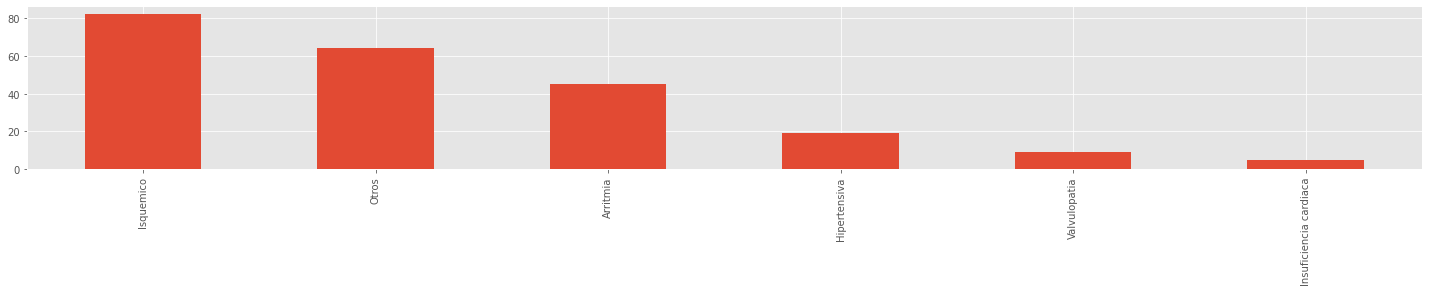

In [4]:
# Se puede variar 'i' desde 0 a 1542, que son el número de columnas

i=38
print('Variable: {} . Tipo: {}'.format(df[df.columns.values[i]].name, df[df.columns.values[i]].dtype))
print('\nValores diferentes: {}'.format(len(df[df.columns.values[i]].value_counts(dropna=True))))
if len(df[df.columns.values[i]].value_counts(dropna=False))<15:
  print('Que son:\n {}'.format(df[df.columns.values[i]].value_counts(dropna=False)))

print('\nDatos disponibles: {}/{}'.format(rowsInData-df[df.columns.values[i]].isnull().sum(),rowsInData))

df[df.columns.values[i]].value_counts(dropna=True).plot(kind='bar', figsize=(25,3))

# Si los datos son numéricos se puede realizar un histograma
#df[df.columns.values[i]].plot.hist(figsize=(24,4), title=df[df.columns.values[i]].name)



# Estudio de Missing Values por columnas

La zona alta de la gráfica significa columnas con casi todas las entradas con valores. La parta baja son columnas que no tienen casi valores.

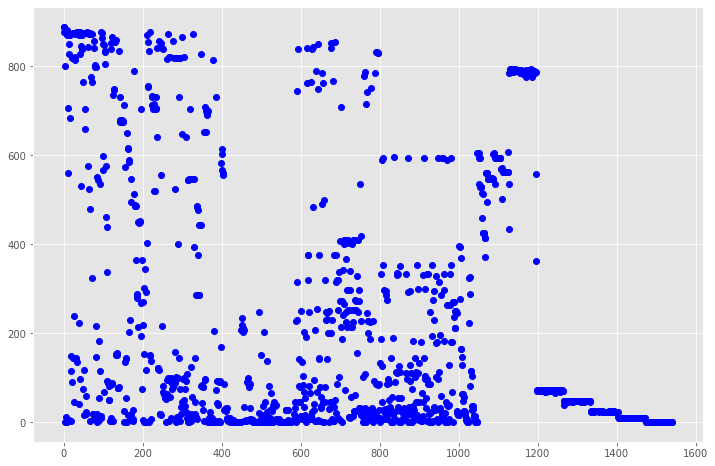

In [5]:
available_data=[]
for col in df.columns:
  available_data.append(rowsInData-df[col].isnull().sum())

plt.plot(available_data,'bo')

In [6]:
print(available_data)

[889, 889, 878, 878, 1, 801, 13, 1, 2, 882, 871, 561, 707, 828, 851, 6, 871, 683, 149, 3, 116, 92, 819, 145, 874, 874, 239, 47, 873, 821, 815, 874, 145, 136, 878, 878, 876, 878, 224, 41, 870, 98, 877, 827, 532, 845, 840, 839, 871, 764, 75, 117, 874, 16, 705, 659, 60, 24, 19, 876, 875, 843, 576, 875, 873, 525, 874, 479, 4, 873, 775, 872, 325, 764, 20, 20, 7, 841, 857, 802, 798, 798, 217, 148, 551, 19, 1, 3, 544, 182, 55, 6, 116, 536, 15, 11, 877, 875, 864, 850, 598, 568, 68, 848, 805, 833, 834, 462, 576, 339, 439, 94, 91, 88, 83, 51, 50, 4, 85, 10, 853, 840, 87, 88, 866, 3, 736, 750, 747, 856, 857, 855, 860, 152, 154, 151, 155, 78, 78, 78, 79, 834, 731, 675, 679, 678, 677, 678, 679, 675, 678, 675, 1, 25, 713, 135, 573, 144, 142, 56, 1, 650, 16, 616, 614, 204, 590, 586, 230, 7, 546, 18, 495, 8, 6, 7, 4, 27, 789, 513, 488, 487, 487, 365, 486, 288, 287, 280, 215, 450, 450, 450, 449, 452, 450, 703, 195, 268, 76, 364, 271, 218, 6, 302, 1, 154, 345, 2, 1, 117, 293, 403, 871, 855, 756, 753, 83

## Podemos rescatar 174 columnas que tienen más de un 85% de valores completados

In [7]:
len([aux for aux in available_data if aux > 0.85*rowsInData])

174

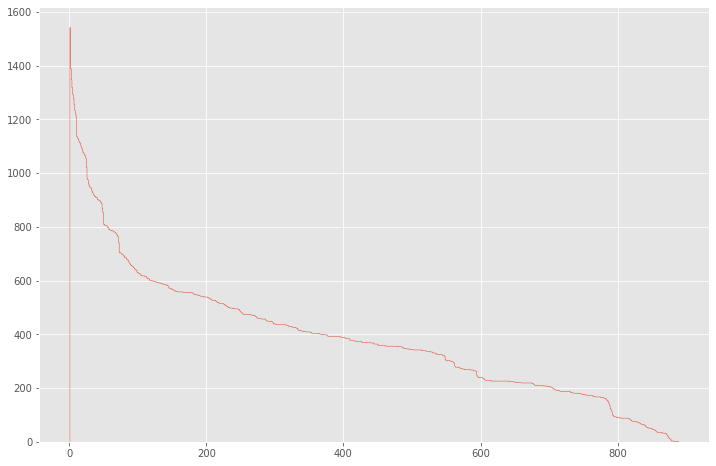

In [8]:
# SI NOS QUEREMOS QUEDAR CON COLUMNAS QUE ESTAN VALORADAS EN AL MENOS 600 REGISTROS DE

cumulative_frequency = plt.hist(available_data, bins=rowsInData, histtype='step', cumulative=-1)

In [9]:
cumulative_frequency[0]

array([1542., 1389., 1348., 1319., 1293., 1276., 1256., 1233., 1219.,
       1210., 1136., 1131., 1126., 1119., 1114., 1109., 1100., 1093.,
       1084., 1078., 1073., 1068., 1066., 1056., 1022.,  980.,  975.,
        960.,  953.,  948.,  946.,  943.,  933.,  927.,  922.,  918.,
        914.,  913.,  909.,  909.,  902.,  901.,  899.,  897.,  896.,
        892.,  887.,  870.,  855.,  810.,  809.,  805.,  805.,  804.,
        803.,  798.,  797.,  790.,  789.,  788.,  787.,  786.,  786.,
        784.,  781.,  781.,  779.,  777.,  772.,  769.,  764.,  741.,
        704.,  704.,  703.,  700.,  697.,  697.,  694.,  691.,  686.,
        686.,  684.,  679.,  677.,  675.,  669.,  665.,  660.,  657.,
        655.,  654.,  651.,  648.,  644.,  642.,  640.,  638.,  631.,
        630.,  627.,  626.,  625.,  621.,  620.,  618.,  618.,  618.,
        618.,  616.,  616.,  616.,  611.,  607.,  607.,  607.,  603.,
        600.,  600.,  600.,  599.,  599.,  597.,  597.,  597.,  596.,
        594.,  594.,

In [13]:
np.sum(cumulative_frequency[0]<100)

96

### 1.3. Visualizing Missing Data

#### 1.3.1. Missing Data HeatMap

In [48]:
cols = df.columns[:9]
different_nulls = np.bitwise_xor(df[cols[2]].isnull(),df[cols[3]].isnull())
df[[cols[2],cols[3]]][different_nulls] 


,Cod_postal_E1_C1,Provincia_E1_C1
77,41089.0,NaN
90,41700.0,NaN
94,41006.0,NaN
154,11380.0,NaN
506,NaN,Otros
650,NaN,Sevilla
797,NaN,Sevilla
887,NaN,Sevilla


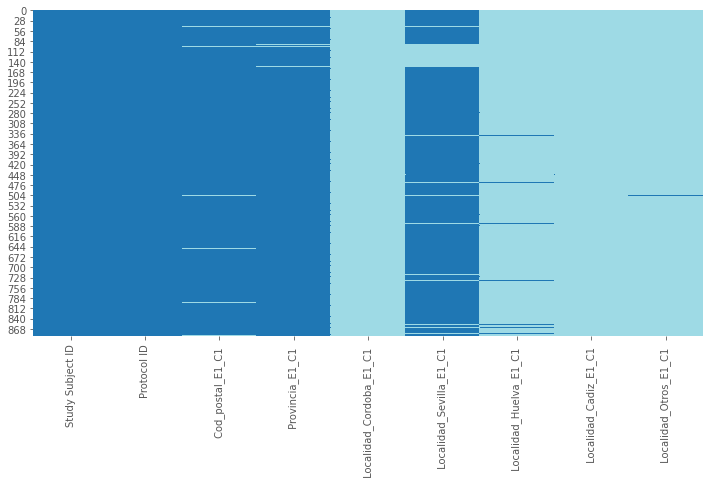

In [47]:
cols = df.columns[:9]
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
plt.figure(figsize=(12,6))
sns.heatmap(df[cols].isnull(), cmap="tab20", cbar=False) #cmap=sns.color_palette(colours)

#### 1.3.2. Missing Data Percentage List


In [0]:
# if it's a larger dataset and the visualization takes too long can do this.
# % of missing.
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100,4)))

#### 1.3.3. Missing Data Bar Plot


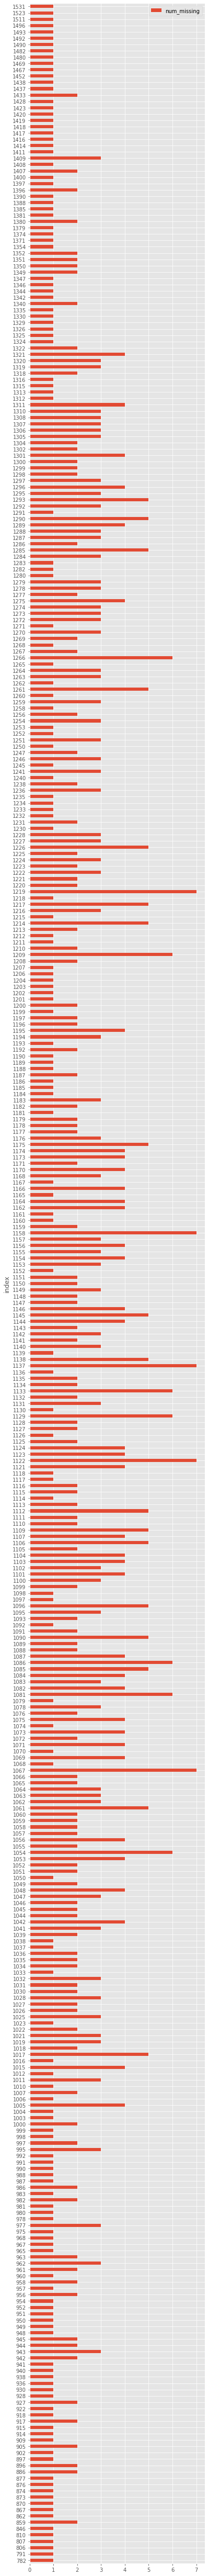

In [4]:
# first create missing indicator for features with missing data
for col in df.columns:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  
        #print('created missing indicator for: {}'.format(col))
        df['{}_ismissing'.format(col)] = missing

# then based on the indicator, plot the bar plot of missing values
# that is, how many "num_missing" variables have "index" missing values
# for instance 2 variable have 1433 missing values
ismissing_cols = [col for col in df.columns if 'ismissing' in col]
df['num_missing'] = df[ismissing_cols].sum(axis=1)

df['num_missing'].value_counts().reset_index().sort_values(by='index').plot.barh(x='index', y='num_missing', figsize=(6,90))


#### 1.3.4. Missing Data Histogram

In [0]:
df[ismissing_cols].sum(axis=0)

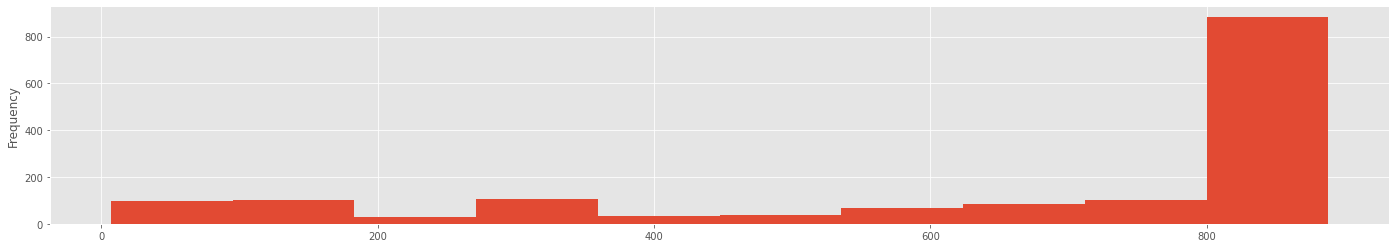

In [6]:
# Plot the histogram of missing values
# that is, there are about 150 features with only 1 instance (888 missing data) 
#   - Alternative: Sturges rule, interv_class=1+log_2(N)=10.8 con N=889 el número de datos
df[ismissing_cols].sum(axis=0).plot.hist(figsize=(24,4), bins=10)
#plt.hist(df['num_missing'].value_counts().reset_index().sort_values(by='index')[[num_missing]],bins='sturges',color='green',density=True)

### 1.4. Handling Missing Data

#### 1.4.1. Dropping Observations

We will drop almost all the obervations

In [0]:
# drop rows with a lot of missing values.
# Only 95 instances remain having less than 1000 dim missing
ind_missing = df[df['num_missing'] > 1000].index
df_less_missing_rows = df.drop(ind_missing, axis=0)
print(df_less_missing_rows.shape)

(95, 3085)


#### 1.4.2. Dropping Features

From Missing Data Percentage List, we can determine these features.

In [0]:
# if it's a larger dataset and the visualization takes too long can do this.
# % of missing.
cols_to_drop = []
lst_pct_missing =[]
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    lst_pct_missing.append(round(pct_missing*100,4))
    print('{} - {}%'.format(col, round(pct_missing*100,4)))
    if pct_missing > 0.05:
      cols_to_drop.append(col)


Columnas a eliminar [' Localidad_Cordoba_E1_C1 ', ' Localidad_Sevilla_E1_C1 ', ' Localidad_Huelva_E1_C1 ', ' Localidad_Cadiz_E1_C1 ', ' Localidad_Otros_E1_C1 ', ' Nivel_Estudios_E1_C1 ', ' Nivel_SocioEconomico_E1_C1 ', ' Etnia_E1_C1 ', ' Procedencia_otros_E1_C1 ', ' Radical_Tipo_E1_C1 ', ' Paliativo_Tipo_E1_C1 ', ' Paliativo_Otros_E1_C1 ', ' Primer_Sintoma_Paliativo_E1_C1 ', ' Fecha_Primer_Sintoma_Paliativo_E1_C1 ', ' Alergia_E1_C1 ', ' Alergia_txt_E1_C1 ', ' Antecedentes_digestivos_Tipo_E1_C1 ', ' Antecedentes_digestivos_otros_E1_C1 ', ' VIH_E1_C1 ', ' Tuberculosis_E1_C1 ', ' Otra_neoplasia_Tipo_E1_C1 ', ' Otra_neoplasia_Fecha_E1_C1 ', ' Tipo_Cardiopatia_E1_C1 ', ' Tipo_Cardiopatia_otros_E1_C1 ', ' Fenomeno_tromboembolico_Fecha_E1_C1 ', ' Fecha_inicio_tabaquismo_E1_C1 ', ' Fecha_fin_tabaquismo_E1_C1 ', ' Annos_fumando_E1_C1 ', ' Paquetes_anno_E1_C1 ', ' Otros_antecedentes_E1_C1 ', ' Otros_antecedentes_txt_E1_C1 ', ' Medicacion_habitual_E1_C1 ', ' Primer_sintoma_primario_otros_E1_C1 '

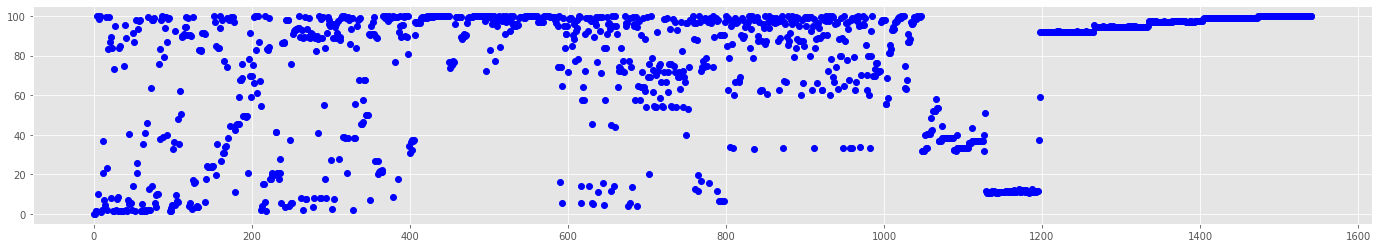

In [0]:
print('\nColumnas a eliminar {}\n'.format(cols_to_drop))
print(len(cols_to_drop))
plt.figure(figsize=(24,4))
plt.plot(lst_pct_missing[:1542],'bo')
plt.show()

#### 1.4.3. Imputing the Missing Values

* When the feature is a numeric variable, we can conduct missing data imputation. This works by imputing all missing values with **zero**, the **mean** or **median**.
* When the feature is a categorical variable, we may impute the missing data by the **mode** (the most frequent value).

In [0]:
# impute the missing values and create the missing value indicator variables for each numeric column.

df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print('\nColumnas numericas {}\n'.format(numeric_cols))
print(len(numeric_cols))

df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print('\nColumnas no numericas {}\n'.format(non_numeric_cols))
print(len(non_numeric_cols))
